##EJERCICIO DE CLASE - REGRESIÓN LINEAL

**Estudiante:** Yisela Andrea Narváez Sánchez.

**2. Regresión lineal**

En esta parte, implementarás regresión lineal con múltiples variables para predecir los precios de casas. Supón que estás vendiendo tu casa y quieres saber cuál sería un buen precio de mercado. Una forma de hacerlo es recopilar información sobre casas vendidas recientemente y crear un modelo de precios de viviendas.

El archivo ex1data2.txt contiene un conjunto de entrenamiento con precios de casas en Portland, Oregón. La primera columna representa el tamaño de la casa (en pies cuadrados), la segunda columna es el número de habitaciones y la tercera columna es el precio de la casa.


**Objetivo:** Implementar un modelo de regresión lineal para predecir ganancias según la población de una ciudad.


**Paso 1:** Cargar las librerías necesarias

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para visualización en 3D

**Paso 2:** Cargar y visualizar los datos

**X:** variable independiente (Población)

**y:** variable dependiente o respuesta (Ganancia)

In [8]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:, 0]  # Población
y = data[:, 1]  # Ganancias
m = len(y)      # Número de ejemplos

print("Paso 2: Datos cargados.")
print(f"Primeras 5 filas de datos:\n{data[:5]}")

Paso 2: Datos cargados.
Primeras 5 filas de datos:
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


**paso 3:**  Visualización de los datos

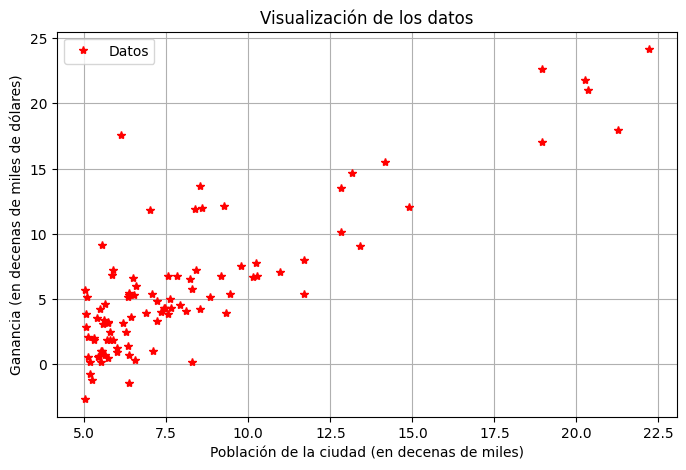

In [9]:
plt.figure(figsize=(8,5))
plt.plot(X, y, '*r', label='Datos')
plt.xlabel('Población de la ciudad (en decenas de miles)')
plt.ylabel('Ganancia (en decenas de miles de dólares)')
plt.title('Visualización de los datos')
plt.grid(True)
plt.legend()
plt.show()

Se realiza un gráfico de dispersión con el objetivo de observar la relación entre la población y las ganancias, y a partir de la visualización se puede concluir que existe una relación lineal positiva, ya que a medida que aumenta la población también tienden a incrementarse las ganancias.

**Paso 4:** Preparar los datos: Agregar una columna de unos para el termino de sesgo.

In [10]:
X = np.vstack([np.ones(m), X]).T  # [1, población]
y = y.reshape(-1, 1)              # Asegurar que y tenga forma de columna
theta = np.zeros((2, 1))         # Inicializo los parámetros en cero

**paso 5:** Definir la función de costo

In [12]:
def cost_function(theta, X, y):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

# Verifico que la función de costo funcione con theta en cero
print("Costo inicial con theta en ceros:", cost_function(theta, X, y))

Costo inicial con theta en ceros: 32.072733877455676


La función de costo mide qué tan mal está nuestro modelo. Calcula el error cuadrático medio. Si J es muy grande, nuestro modelo no está prediciendo bien.

**paso 5.** Descenso por gradiente

In [13]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = []

    for i in range(iterations):
        error = X @ theta - y
        gradient = (1 / m) * (X.T @ error)
        theta = theta - alpha * gradient
        J = cost_function(theta, X, y)
        J_history.append(J)

        # Muestro el costo cada 100 iteraciones para monitorear
        if i % 100 == 0 or i == iterations - 1:
            print(f"Iteración {i+1}/{iterations} | Costo: {J:.6f}")

    return theta, J_history


Esta función ajusta los valores de theta poco a poco para minimizar el costo.

**Paso 6:** Probar diferentes tasas de aprendizaje y número de iteraciones
Se selecciona alpha = 0.01 y 1500 iteraciones por recomendación.

In [14]:
alpha = 0.01
iterations = 1500
theta = np.zeros((2, 1))  # Reinicio los parámetros

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

print("Parámetros encontrados (theta):", theta.ravel())

Iteración 1/1500 | Costo: 6.737190
Iteración 101/1500 | Costo: 5.476363
Iteración 201/1500 | Costo: 5.173635
Iteración 301/1500 | Costo: 4.962606
Iteración 401/1500 | Costo: 4.815501
Iteración 501/1500 | Costo: 4.712956
Iteración 601/1500 | Costo: 4.641474
Iteración 701/1500 | Costo: 4.591644
Iteración 801/1500 | Costo: 4.556908
Iteración 901/1500 | Costo: 4.532694
Iteración 1001/1500 | Costo: 4.515815
Iteración 1101/1500 | Costo: 4.504049
Iteración 1201/1500 | Costo: 4.495847
Iteración 1301/1500 | Costo: 4.490129
Iteración 1401/1500 | Costo: 4.486143
Iteración 1500/1500 | Costo: 4.483388
Parámetros encontrados (theta): [-3.63029144  1.16636235]


**Paso 7:** Visualización del ajuste lineal

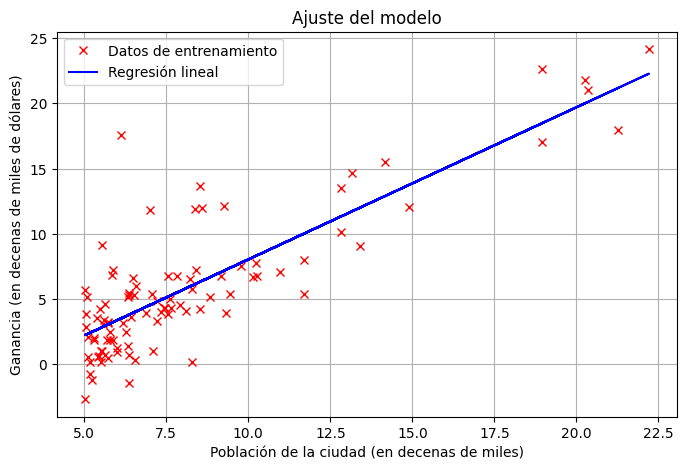

In [20]:
plt.figure(figsize=(8,5))
plt.plot(X[:,1], y, 'xr', label='Datos de entrenamiento')
plt.plot(X[:,1], X @ theta, 'b-', label='Regresión lineal')
plt.xlabel('Población de la ciudad (en decenas de miles)')
plt.ylabel('Ganancia (en decenas de miles de dólares)')
plt.title('Ajuste del modelo')
plt.legend()
plt.grid(True)
plt.show()

**Paso 8:** Predicciones

In [16]:
poblacion1 = 3.5
poblacion2 = 7.0
predict1 = np.array([1, poblacion1]) @ theta
predict2 = np.array([1, poblacion2]) @ theta

print(f'Para una población de 35,000 se predice una ganancia de ${predict1.item()*10000:.2f}')
print(f'Para una población de 70,000 se predice una ganancia de ${predict2.item()*10000:.2f}')

Para una población de 35,000 se predice una ganancia de $4519.77
Para una población de 70,000 se predice una ganancia de $45342.45


**Paso 9:** Visualizar la función de costo en 3D y como contorno

In [17]:
print("Visualizando la función de costo J(theta)...")

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = cost_function(t, X, y)

J_vals = J_vals.T

Visualizando la función de costo J(theta)...


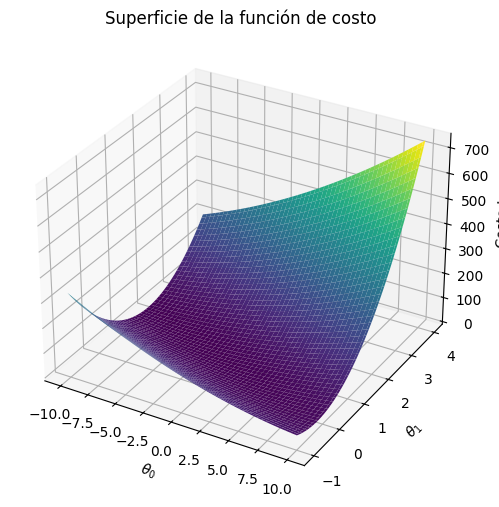

In [18]:
# Gráfico en 3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Costo J')
ax.set_title('Superficie de la función de costo')
plt.show()


Donde el punto más bajo es el theta que minimiza el error.

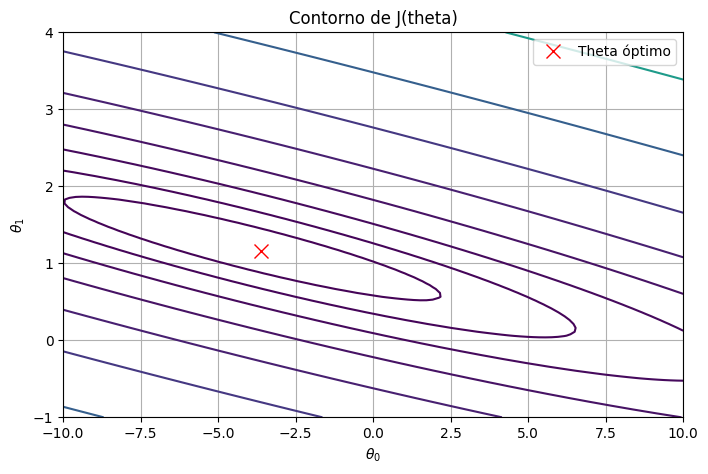

In [19]:
# Contorno
plt.figure(figsize=(8,5))
cp = plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2, label='Theta óptimo')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Contorno de J(theta)')
plt.legend()
plt.grid(True)
plt.show()

 el punto rojo indica los valores óptimos de theta.